## COG403 In-class Lab on Probabilities

This lab serves as a preparatory exercise on probabilities. It is recommended that you attempt this lab in pairs or individually during the in-class lab time (about 40 minutes) after a brief presentation from the instructor/TA. You may consult the instructor/TA with clarification questions. 

Note that you are not obliged or expected to complete the lab within the in-class lab time---this is a self-paced lab for learning purposes (nor will you be assessed through this preparatory lab). 

### Marginal, conditional, and joint probabilities

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

x and y that represent sequences of observation from two 6-sided dices.

In [24]:
x = [4,2,5,5,6,2,4,3,2,1,5,1,3,2,6,1,2,6,1,4]
y = [6,1,5,5,3,2,4,3,1,1,1,2,6,1,1,1,1,3,1,1]

**Q1:** Calculate marginal probabilities p(x) and p(y) for the integer range 1 to 6. Consider visualizing these marginal probabilities in two separate histograms, for x and y.


In [31]:
# from collections import Counter

# def marginal_probability(dice_rolls):
#     roll_counts = Counter(dice_rolls)
#     total_rolls = len(dice_rolls)
#     marginal_probabilities = {roll: count/total_rolls for roll, count in roll_counts.items()}
#     return marginal_probabilities
#
#
# p_x = marginal_probability(x)
# p_y = marginal_probability(y)

def marginal_probabilities(x, y):
    # Calculate the frequencies of each integer in the list x
    x_frequencies = np.bincount(x)

    # Calculate the total number of integers in the list x
    x_total = len(x)

    # Divide the frequencies by the total number of integers to get the marginal probabilities
    px = x_frequencies / x_total

    # Add the missing values for integers that don't appear in the list
    #px = np.pad(px, (1, 6 - len(px)), mode='constant')
    px = np.pad(px, (1, max(6 - len(px), 0)), mode='constant')


    # Calculate the frequencies of each integer in the list y
    y_frequencies = np.bincount(y)

    # Calculate the total number of integers in the list y
    y_total = len(y)

    # Divide the frequencies by the total number of integers to get the marginal probabilities
    py = y_frequencies / y_total

    # Add the missing values for integers that don't appear in the list
    #py = np.pad(py, (1, 6 - len(py)), mode='constant')
    py = np.pad(py, (1, max(6 - len(py), 0)), mode='constant')

    # px = px.reshape(-1,1)
    # py = py.reshape(-1,1)
    px = px[:6]
    py = py[:6]

    px = pd.DataFrame(px, columns=['p(x)'], index=range(1, 7))
    py = pd.DataFrame(py, columns=['p(y)'], index=range(1, 7))

    return px, py

p_x, p_y = marginal_probabilities(x,y)


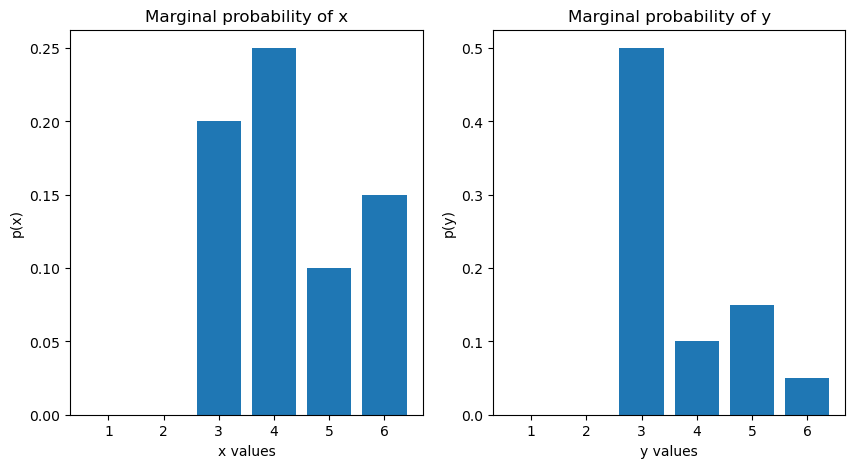

In [33]:
# p_x = marginal_probability(x)
#
# # Create the bar chart
# plt.bar(p_x.keys(), p_x.values())
# plt.xlabel('Dice Roll')
# plt.ylabel('Probability')
# plt.title('Marginal Probabilities of Dice Rolls in x')
#
# p_y = marginal_probability(y)
#
# # Create the bar chart
# plt.bar(p_y.keys(), p_y.values())
# plt.xlabel('Dice Roll')
# plt.ylabel('Probability')
# plt.title('Marginal Probabilities of Dice Rolls in y')
#
# # Show the chart
# plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(range(1,7), p_x["p(x)"], align='center')
axs[0].set_xlabel("x values")
axs[0].set_ylabel("p(x)")
axs[0].set_title("Marginal probability of x")
axs[1].bar(range(1,7), p_y["p(y)"], align='center')
axs[1].set_xlabel("y values")
axs[1].set_ylabel("p(y)")
axs[1].set_title("Marginal probability of y")
plt.show()


**Q2:** Calculate the following conditional probabilities: p(y=1|x=2), p(x=1|y=2).

In [13]:
def conditional_probability(x_toss, y_toss, x_value, y_value):
    x_count = x_rolls.count(x_value)
    xy_count = sum([1 for i, j in zip(x_rolls, y_toss) if i == x_value and j == y_value])
    return xy_count / x_count

x_rolls = x
y_rolls = y

p_y1_given_x2 = conditional_probability(x_rolls, y_rolls, 2, 1)
p_x1_given_y2 = conditional_probability(y_rolls, x_rolls, 2, 1)

print("y value:", p_x1_given_y2, "\nx value:", p_y1_given_x2)


y value: 0.0 
x value: 0.8


**Q3:** Calculate the following joint probability: p(x=5,y=5).

In [14]:
def joint_probability(x, y, event):
    xy_pairs = list(zip(x, y))
    event_count = xy_pairs.count(event)
    total_count = len(x) + len(y)
    return event_count / total_count

p_x5_y5 = joint_probability(x, y, (5,5))
print(p_x5_y5)

0.05


**Q4:** Compute a 6-by-6 contingency table assuming that x and y are independent.

In [21]:
### The first formulas just use python, the second is line comprehension. The final uses numpy and then pandas to make a display
# x_marginal_prob = marginal_probability(x)
# y_marginal_prob = marginal_probability(y)
#
# # Initialize a nested list to represent the contingency table
# contingency_table = [[0 for _ in range(6)] for _ in range(6)]
# for x_value in range(1, 7):
#     for y_value in range(1, 7):
#         contingency_table[x_value-1][y_value-1] = x_marginal_prob[x_value] * y_marginal_prob[y_value]
#
# # contingency_table = [[x_marginal_prob[i] * y_marginal_prob[j] for j in range(1, 7)] for i in range(1, 7)]
# print(contingency_table)

x_marginal_prob = marginal_probability(x)
y_marginal_prob = marginal_probability(y)

# create an empty 6x6 array
contingency_table = np.empty((6, 6))

for x_value in range(1, 7):
    for y_value in range(1, 7):
        contingency_table[x_value-1][y_value-1] = x_marginal_prob[x_value] * y_marginal_prob[y_value]

contingency_table = pd.DataFrame(contingency_table, columns=range(1,7), index=range(1,7))
print(contingency_table)

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = [i for i in range(1,7)]
for i in range(6):
    x.add_row(contingency_table[i])
print(x)

from tabulate import tabulate
print(tabulate(contingency_table, headers='keys', tablefmt='fancy_grid'))

TypeError: object of type 'PrettyTable' has no len()

**Q5:** (optional) Use chi-squared test to verify if x and y are independent.